In [ ]:
import numpy as np
import pandas as pd
import fix_yahoo_finance as fyf
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stocks = "AAPL MSFT PYPL NVDA CYBR SMH SNX ADBE TER"
stocks = stocks.split( )
data = fyf.download(stocks, start='2019-09-01')['Close']
data.head()

[*********************100%***********************]  9 of 9 downloaded


,AAPL,ADBE,CYBR,MSFT,NVDA,PYPL,SMH,SNX,TER
Date,,,,,,,,,
2019-09-03,51.424999,282.450012,112.300003,136.039993,164.169998,106.750000,112.610001,82.500000,52.209999
2019-09-04,52.297501,284.600006,114.290001,137.630005,168.759995,108.730003,115.930000,85.489998,53.639999
2019-09-05,53.320000,287.750000,115.900002,140.050003,179.740005,111.459999,119.449997,87.690002,55.919998
2019-09-06,53.314999,284.940002,113.709999,139.100006,178.649994,110.050003,119.550003,90.589996,56.080002
2019-09-09,53.542500,279.299988,107.400002,137.520004,180.500000,105.430000,120.010002,91.680000,57.400002


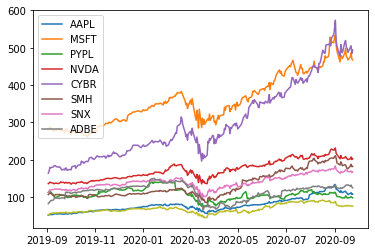

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.legend(['AAPL' ,'MSFT' ,'PYPL' ,'NVDA' ,'CYBR' ,'SMH' ,'SNX' ,'ADBE'])

In [ ]:
returns = pd.DataFrame()
for stock in data:
  if stock not in returns:
    returns[stock] = np.log(data[stock]).diff()
returns = returns[1:]
returns.head()

,AAPL,ADBE,CYBR,MSFT,NVDA,PYPL,SMH,SNX,TER
Date,,,,,,,,,
2019-09-04,0.016824,0.007583,0.017565,0.011620,0.027575,0.018378,0.029056,0.035601,0.027021
2019-09-05,0.019363,0.011007,0.013989,0.017431,0.063034,0.024798,0.029911,0.025409,0.041627
2019-09-06,-0.000094,-0.009813,-0.019076,-0.006806,-0.006083,-0.012731,0.000837,0.032536,0.002857
2019-09-09,0.004258,-0.019992,-0.057091,-0.011424,0.010302,-0.042888,0.003840,0.011960,0.023265
2019-09-10,0.011744,-0.011378,-0.038632,-0.010526,0.014738,-0.022833,0.001998,0.023713,-0.009628


In [ ]:
returns.describe()

,AAPL,ADBE,CYBR,MSFT,NVDA,PYPL,SMH,SNX,TER
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.002776,0.001882,-0.000503,0.001497,0.004110,0.001995,0.001477,0.001544,0.001416
std,0.027226,0.028458,0.032761,0.026137,0.035086,0.030398,0.026958,0.036222,0.031951
min,-0.137708,-0.159525,-0.149280,-0.159453,-0.203979,-0.172259,-0.155621,-0.172710,-0.124430
25%,-0.007231,-0.009016,-0.014033,-0.009720,-0.011145,-0.012051,-0.009986,-0.011937,-0.014788
50%,0.003591,0.003792,0.001351,0.002334,0.003909,0.001467,0.001918,0.002046,0.002325
75%,0.015794,0.012939,0.016962,0.011775,0.023380,0.016123,0.015324,0.015022,0.018856
max,0.113157,0.163133,0.123608,0.132929,0.158340,0.131991,0.098246,0.162012,0.138901


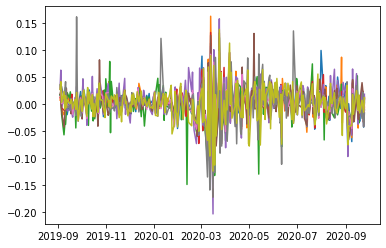

In [ ]:
plt.plot(returns)

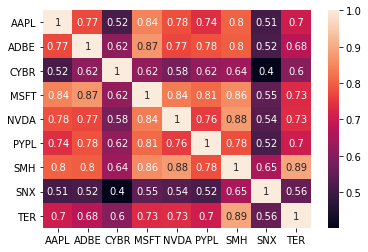

In [ ]:
corrMatrix=returns.corr()

sn.heatmap(corrMatrix, annot = True)
plt.show()

AttributeError: ignored